In [343]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from wordcloud import WordCloud
from datetime import date
import random 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [344]:
# Helper functions for visualization
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["default"] == 1]
    df0 = app_train[app_train["default"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='default : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='default : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [345]:
# Import the data
os.getcwd()
app_train = pd.read_csv("./train_data.csv")
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc
0,63480419,Current,NaN,15954,debt_consolidation,KS,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,5-Aug,15-Nov,Not Verified,5 years,24.85,Branch Office Administrator,62000.00
1,51386490,Current,NaN,73814,debt_consolidation,MD,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Sep-83,15-Jun,Verified,10+ years,26.38,IIntelligence Analyst,113000.00
2,13567696,Current,NaN,30013,major_purchase,TX,Major purchase,OWN,INDIVIDUAL,NaN,Dec-99,14-Apr,Not Verified,10+ years,14.41,Global Service Delivery Lead,180000.00
3,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00
4,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00
5,35683119,Current,NaN,10327,debt_consolidation,MI,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,3-Jun,14-Nov,Source Verified,4 years,19.98,machine operator,60000.00
6,28674611,Current,NaN,41756,debt_consolidation,CA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-86,14-Oct,Verified,10+ years,20.11,Assistant Manager,82000.00
7,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00
8,51186597,Current,76.0,5259,debt_consolidation,NC,Debt consolidation,RENT,INDIVIDUAL,NaN,6-Feb,15-Jun,Not Verified,10+ years,5.01,Owner,60000.00
9,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00


# Exploratory Data Analysis

Check how many features are there, and how many data rows are there.

In [481]:
app_train.shape

(60021, 8)

There are 17 features, and 200,000 rows.
Next, let's check data types.

In [482]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60021 entries, 0 to 60020
Data columns (total 8 columns):
revol_bal              60021 non-null int64
purpose                60021 non-null int64
home_ownership         60021 non-null int64
verification_status    60021 non-null int64
emp_length             60021 non-null float64
dti                    60021 non-null float64
annual_inc             60021 non-null float64
default                60021 non-null int64
dtypes: float64(3), int64(5)
memory usage: 3.7 MB


We can see that there are ..., and .... of object type.
Next, let's check missing values.

In [483]:
app_train.isnull().sum()

revol_bal              0
purpose                0
home_ownership         0
verification_status    0
emp_length             0
dti                    0
annual_inc             0
default                0
dtype: int64

I notice that most data are missing for "mths_since_last_major_derog" and "verification_status_joint". Most likely to drop these columns. The rest of missing columns are: "emp_title", "emp_length", "title", "earliest_cr_line", "annual_inc".

In [349]:
app_train.application_type.value_counts()

INDIVIDUAL    199889
JOINT            111
Name: application_type, dtype: int64

I also notice that the column 'purpose' and 'title' contain essential the same information. As a result, we can drop the column 'title'. Vast majority of applications are individual! 99%. Therefore we can think of dropping this column as well.
Next, let's explore the "loan_status" column.

In [484]:
app_train.loan_status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'loan_status'

We can see that there are several categories for  'loan_status'. The one we care about are ...

Due to the nature of the problem, we'd have to perform a filtering step here, to get the 'default' YES and NO classes

In [489]:
# Helper function to filter the 'default' YES and NO classes.
def f(row):
    if row['loan_status'] in ['Fully Paid']:
        val = 0
    elif row['loan_status'] in ['Charged Off', 'Late (31-120 days)', 'Default']:
        val = 1
    else: val = -1    
    return val

With the help of the above helper function, we can attain the data that we want to examine.

In [352]:
app_train['default'] = app_train.apply(f, axis=1)
app_train.default.value_counts()

-1    139979
 0     46837
 1     13184
Name: default, dtype: int64

In [353]:
app_train = app_train[(app_train.default == 0) | (app_train.default == 1)]
app_train.reset_index(inplace=True)
app_train.drop(columns=['index'], inplace=True)
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,Fully Paid,NaN,17469,debt_consolidation,SD,Debt consolidation,RENT,INDIVIDUAL,NaN,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,Fully Paid,NaN,7992,debt_consolidation,AR,Debt Pay Off,MORTGAGE,INDIVIDUAL,NaN,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,Fully Paid,NaN,20720,debt_consolidation,GA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,Fully Paid,NaN,7953,debt_consolidation,MO,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,Charged Off,NaN,17212,credit_card,NY,Consolidate,RENT,INDIVIDUAL,NaN,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,Fully Paid,NaN,7839,debt_consolidation,NC,Financial Freedom (Debt Consolidation),RENT,INDIVIDUAL,NaN,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


Now we can visualize the relation between class 'default' YES and 'NO' with respect to other features.
First, let's look at 'defaul't distribution.

In [508]:
# Target Variable Distribution 
init_notebook_mode(connected=True)
bar_hor(app_train, "default", "Distribution of default variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['default : 1','default : 0'])

Let's find out what the main purposes for getting loans are

In [357]:
app_train.purpose.value_counts()

debt_consolidation    35537
credit_card           11685
home_improvement       3537
other                  3381
major_purchase         1405
small_business         1081
car                     868
medical                 679
moving                  506
house                   420
wedding                 414
vacation                371
educational              77
renewable_energy         60
Name: purpose, dtype: int64

In [358]:
tr0 = bar_hor(app_train, "purpose", "Distribution of purpose Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('purpose', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["purpose Distribution" , "purpose, default=1" ,"purpose, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

The main purpose of getting loans are for "debt_consolidation", followed by "credit_card", and "home_improvement". Interestingly, "credit_card" and "home_improvement" puspose tend to "default" less, while "small_business" has the highest default rate. Therefore, it's likely that purpose is among good feature for classification. 

Next, let's see state distribution.

In [359]:
app_train.addr_state.value_counts()

CA    10011
NY     5066
TX     4613
FL     4240
NJ     2305
IL     2144
PA     1973
GA     1942
VA     1864
OH     1820
NC     1665
AZ     1494
MA     1439
MD     1438
MI     1406
WA     1397
CO     1353
MN     1035
MO      904
CT      887
NV      877
OR      809
AL      766
LA      740
WI      738
SC      713
IN      640
TN      586
OK      549
KY      530
KS      489
UT      482
AR      434
HI      364
NM      311
WV      280
NH      270
RI      254
DC      205
DE      186
MT      167
AK      151
WY      139
SD      134
VT      104
MS       94
NE        8
IA        3
ME        2
Name: addr_state, dtype: int64

In [360]:
tr0 = bar_hor(app_train, "addr_state", "Distribution of addr_state Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('addr_state', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["addr_state Distribution" , "addr_state, default=1" ,"addr_state, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Notice that most borrowers are from CA and NY, followed by TX and FL. This is understandable due to their corresponding population. Interestingly, some states that have very few applications are among the ones that have highest default rates, but most likely these occur just by chance. My first thought would be that 'state' might no play an important role in 'default' status. Most likely I will drop 'state' for the first analyze.

Next, let's examin 'home_onwership'.

In [361]:
# Check home ownership
app_train.home_ownership.value_counts()

MORTGAGE    29526
RENT        25173
OWN          5279
OTHER          34
NONE            8
ANY             1
Name: home_ownership, dtype: int64

In [362]:
tr0 = bar_hor(app_train, "home_ownership", "Distribution of home_ownership Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('home_ownership', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Home Ownership Distribution" , "home_ownership, default=1" ,"home_ownership, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Most borrowers are having mortgage (%), followed by 'rent' (%)

Next, let's check 'verification_status'. 

In [363]:
# verification_status 	emp_length 	dti 	emp_title 	annual_inc
# Check verification status
app_train.verification_status.value_counts()

Verified           22292
Not Verified       19936
Source Verified    17793
Name: verification_status, dtype: int64

In [364]:
tr0 = bar_hor(app_train, "verification_status", "Distribution of verification_status Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('verification_status', 'Distribution of Default with verification_status')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["verification_status Distribution" , "verification_status, default=1" ,"verification_status, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Interestingly, the ones that are 'Verified' or 'Source Verified' have higher percentage of 'default = 1' compared to 'Not Verified'. In general, it seems that 'verification_status' does not play an essential role to 'default'. Most likely to drop this column in the first experimentation.

Next, let's examine 'emp_length'.

In [365]:
# Check employment length
app_train.emp_length.value_counts()

10+ years    18298
2 years       5618
3 years       4895
< 1 year      4890
5 years       4243
1 year        3944
4 years       3788
6 years       3558
7 years       3311
8 years       2777
9 years       2253
Name: emp_length, dtype: int64

In [366]:
tr0 = bar_hor(app_train, "emp_length", "Distribution of emp_length Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('emp_length', 'Distribution of Default with emp_length')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["emp_length Distribution" , "emp_length, default=1" ,"emp_length, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In general, 'emp_length' does not seem to influence 'default'. Most likely to drop.

In [367]:
app_train.emp_title.value_counts()

Manager                                  489
Teacher                                  431
Registered Nurse                         202
Supervisor                               201
RN                                       176
Sales                                    173
Project Manager                          159
manager                                  157
Driver                                   155
Office Manager                           138
Director                                 132
Engineer                                 118
Owner                                    113
driver                                   111
teacher                                  107
Vice President                           102
General Manager                          100
US Army                                  100
Operations Manager                        98
Administrative Assistant                  91
Executive Assistant                       89
Account Manager                           86
Bank of Am

"Manage" and "manager" are the same, need to combine!

In [292]:
app_train.revol_bal

0         10768
1         35551
2         40836
3         25237
4         17469
5          7992
6         20720
7          7953
8         17212
9          7839
10        15567
11         6932
12        19972
13         8931
14         2486
15         7387
16        24643
17         2302
18       239620
19         3727
20         4676
21         1637
22         5566
23         5498
24         6905
25         2577
26        16190
27         8299
28         7178
29         8364
30        21079
31         1469
32         6897
33        11583
34        20786
35        38631
36         5362
37        13107
38         3902
39        43709
40        14234
41         2829
42          487
43        10427
44        10142
45        18595
46         7679
47         2745
48        19134
49         5647
50        18914
51         7423
52         8692
53        12433
54        16115
55        23284
56         7273
57         5048
58        11405
59         8031
60        13367
61         4613
62      

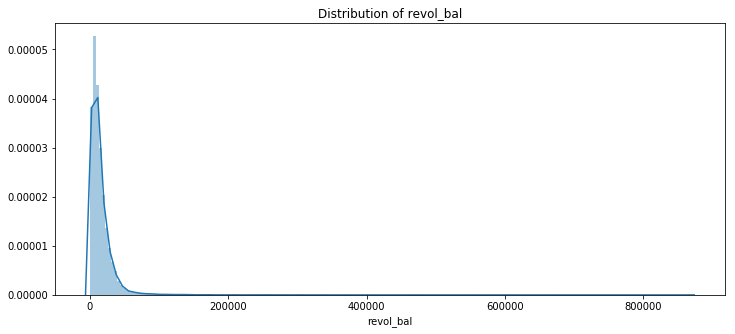

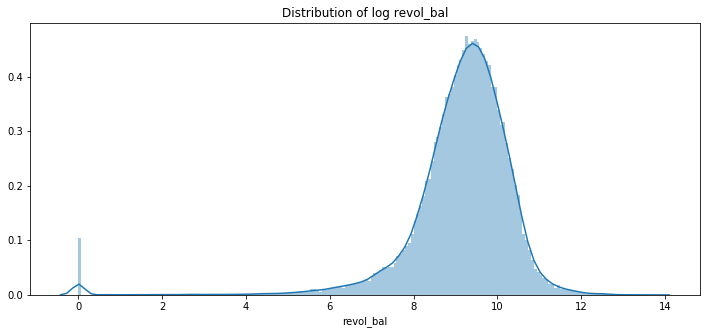

In [293]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of revol_bal")
ax = sns.distplot(app_train["revol_bal"], bins=200)

log_data = np.log(app_train["revol_bal"]+1)
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of log revol_bal")
ax = sns.distplot(log_data, bins=200)
app_train['revol_bal'] = log_data
#plt.hist(heights['Height'], bins = 6)

In [294]:
app_train

,id,revol_bal,purpose,addr_state,home_ownership,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,9.284427,credit_card,DE,MORTGAGE,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,10.478752,home_improvement,WI,MORTGAGE,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,10.617344,debt_consolidation,OH,MORTGAGE,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,10.136106,debt_consolidation,RI,RENT,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,9.768240,debt_consolidation,SD,RENT,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,8.986321,debt_consolidation,AR,MORTGAGE,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,9.938903,debt_consolidation,GA,MORTGAGE,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,8.981430,debt_consolidation,MO,MORTGAGE,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,9.753420,credit_card,NY,RENT,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,8.966994,debt_consolidation,NC,RENT,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


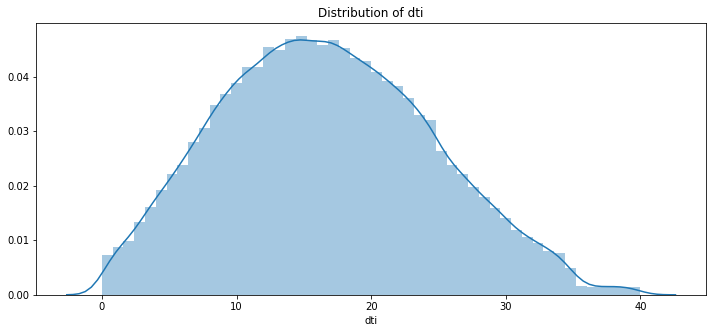

In [295]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of dti")
ax = sns.distplot(app_train["dti"])

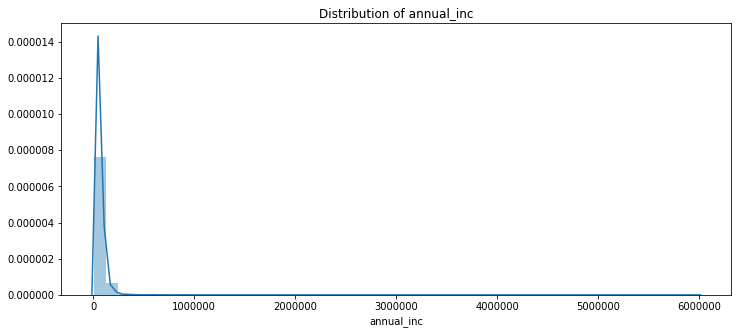

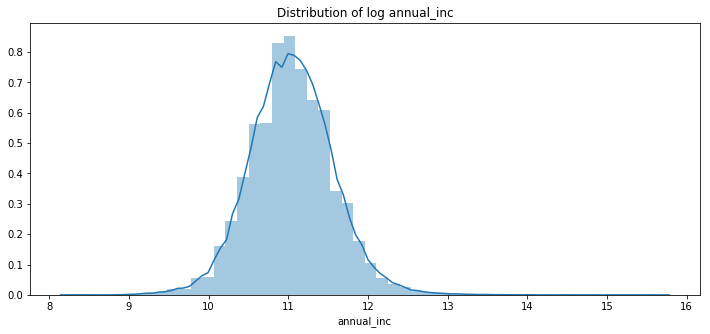

In [296]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of annual_inc")
ax = sns.distplot(app_train["annual_inc"])

log_data = np.log(app_train["annual_inc"])
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of log annual_inc")
ax = sns.distplot(log_data, bins=50)
app_train['annual_inc'] = log_data
#plt.hist(heights['Height'], bins = 6)

In [368]:
#sns.pairplot(app_train)
app_train

,id,revol_bal,purpose,addr_state,home_ownership,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,10768,credit_card,DE,MORTGAGE,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,35551,home_improvement,WI,MORTGAGE,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,40836,debt_consolidation,OH,MORTGAGE,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,25237,debt_consolidation,RI,RENT,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,17469,debt_consolidation,SD,RENT,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,7992,debt_consolidation,AR,MORTGAGE,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,20720,debt_consolidation,GA,MORTGAGE,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,7953,debt_consolidation,MO,MORTGAGE,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,17212,credit_card,NY,RENT,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,7839,debt_consolidation,NC,RENT,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


# Data Cleaning and Impute Missing Data

In [ ]:
app_train.drop(['loan_status'], axis=1, inplace=True)
app_train.drop(['mths_since_last_major_derog', 'verification_status_joint'], axis=1, inplace=True)
app_train.drop(['title'], axis=1, inplace=True)
app_train.drop(['application_type'], axis=1, inplace=True)

In [369]:
app_train.isnull().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [370]:
app_train.emp_length.value_counts()

10+ years    18298
2 years       5618
3 years       4895
< 1 year      4890
5 years       4243
1 year        3944
4 years       3788
6 years       3558
7 years       3311
8 years       2777
9 years       2253
Name: emp_length, dtype: int64

In [371]:
app_train

,id,revol_bal,purpose,addr_state,home_ownership,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
0,22252931,10768,credit_card,DE,MORTGAGE,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.00,0
1,6539569,35551,home_improvement,WI,MORTGAGE,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.00,0
2,7047928,40836,debt_consolidation,OH,MORTGAGE,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.00,0
3,1060578,25237,debt_consolidation,RI,RENT,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.00,0
4,28604357,17469,debt_consolidation,SD,RENT,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.00,0
5,1434490,7992,debt_consolidation,AR,MORTGAGE,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.00,0
6,1605698,20720,debt_consolidation,GA,MORTGAGE,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.00,0
7,12205058,7953,debt_consolidation,MO,MORTGAGE,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.00,0
8,1396541,17212,credit_card,NY,RENT,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.00,1
9,650922,7839,debt_consolidation,NC,RENT,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.00,0


In [372]:
def impute_em_length(x):
    if x == "< 1 year": return 0
    elif x == "10+ years": return 10
    elif pd.isnull(x): return x
    else: return int(str(x).split(" ")[0])

In [373]:
app_train.emp_length = app_train.emp_length.apply(impute_em_length)

In [374]:
app_train.isnull().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [375]:
# Impute "emp_length"
print("Median:", app_train.emp_length.median())
app_train.emp_length.value_counts(sort=True)
app_train.emp_length.fillna(6, inplace=True)

Median: 6.0


Notice: Choose to drop emp_title for now

In [376]:
#app_train.drop(['emp_title'], axis=1)
app_train = app_train.drop(['id', 'earliest_cr_line', 'apply_date', 'emp_title'], axis=1)


In [377]:
app_train = app_train.drop(columns=['addr_state'])

In [378]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60021 entries, 0 to 60020
Data columns (total 8 columns):
revol_bal              60021 non-null int64
purpose                60021 non-null object
home_ownership         60021 non-null object
verification_status    60021 non-null object
emp_length             60021 non-null float64
dti                    60021 non-null float64
annual_inc             60021 non-null float64
default                60021 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.7+ MB


In [379]:
from sklearn import preprocessing

In [380]:
for x in app_train.columns:
    if app_train[x].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(app_train[x].values))
        app_train[x] = label.transform(list(app_train[x].values))

In [381]:
app_train

,revol_bal,purpose,home_ownership,verification_status,emp_length,dti,annual_inc,default
0,10768,1,1,0,10.0,24.31,66000.00,0
1,35551,4,1,2,2.0,1.70,110000.00,0
2,40836,2,1,0,6.0,19.86,98005.00,0
3,25237,2,5,0,10.0,20.01,55000.00,0
4,17469,2,5,1,10.0,16.76,71500.00,0
5,7992,2,1,1,10.0,18.22,93000.00,0
6,20720,2,1,2,10.0,20.73,40000.00,0
7,7953,2,1,1,10.0,29.38,23000.00,0
8,17212,1,5,2,3.0,25.20,48000.00,1
9,7839,2,5,2,3.0,14.29,54250.00,0


In [88]:
#app_train['revol_bal'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [266]:

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(app_train[['revol_bal']])
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0
0,0.679014
1,0.766360
2,0.776496
3,0.741301
4,0.714397
5,0.657212
6,0.726878
7,0.656854
8,0.713313
9,0.655798


In [231]:
app_train.revol_bal = df_normalized[0]
app_train

,revol_bal,purpose,home_ownership,verification_status,emp_length,dti,annual_inc,default
0,0.679014,1,1,0,10.0,24.31,11.097410,0
1,0.766360,4,1,2,2.0,1.70,11.608236,0
2,0.776496,2,1,0,6.0,19.86,11.492774,0
3,0.741301,2,5,0,10.0,20.01,10.915088,0
4,0.714397,2,5,1,10.0,16.76,11.177453,0
5,0.657212,2,1,1,10.0,18.22,11.440355,0
6,0.726878,2,1,2,10.0,20.73,10.596635,0
7,0.656854,2,1,1,10.0,29.38,10.043249,0
8,0.713313,1,5,2,3.0,25.20,10.778956,1
9,0.655798,2,5,2,3.0,14.29,10.901358,0


In [232]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(app_train[['dti']])
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0
0,0.607902
1,0.042511
2,0.496624
3,0.500375
4,0.419105
5,0.455614
6,0.518380
7,0.734684
8,0.630158
9,0.357339


In [233]:
app_train.dti = df_normalized[0]
app_train

,revol_bal,purpose,home_ownership,verification_status,emp_length,dti,annual_inc,default
0,0.679014,1,1,0,10.0,0.607902,11.097410,0
1,0.766360,4,1,2,2.0,0.042511,11.608236,0
2,0.776496,2,1,0,6.0,0.496624,11.492774,0
3,0.741301,2,5,0,10.0,0.500375,10.915088,0
4,0.714397,2,5,1,10.0,0.419105,11.177453,0
5,0.657212,2,1,1,10.0,0.455614,11.440355,0
6,0.726878,2,1,2,10.0,0.518380,10.596635,0
7,0.656854,2,1,1,10.0,0.734684,10.043249,0
8,0.713313,1,5,2,3.0,0.630158,10.778956,1
9,0.655798,2,5,2,3.0,0.357339,10.901358,0


In [234]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(app_train[['annual_inc']])
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0
0,0.381653
1,0.451693
2,0.435862
3,0.356655
4,0.392628
5,0.428675
6,0.312992
7,0.237118
8,0.337990
9,0.354773


In [235]:
app_train.annual_inc = df_normalized[0]
app_train

,revol_bal,purpose,home_ownership,verification_status,emp_length,dti,annual_inc,default
0,0.679014,1,1,0,10.0,0.607902,0.381653,0
1,0.766360,4,1,2,2.0,0.042511,0.451693,0
2,0.776496,2,1,0,6.0,0.496624,0.435862,0
3,0.741301,2,5,0,10.0,0.500375,0.356655,0
4,0.714397,2,5,1,10.0,0.419105,0.392628,0
5,0.657212,2,1,1,10.0,0.455614,0.428675,0
6,0.726878,2,1,2,10.0,0.518380,0.312992,0
7,0.656854,2,1,1,10.0,0.734684,0.237118,0
8,0.713313,1,5,2,3.0,0.630158,0.337990,1
9,0.655798,2,5,2,3.0,0.357339,0.354773,0


In [311]:
app_train.drop(columns=['emp_length'], inplace=True)

In [312]:
app_train = pd.get_dummies(data=app_train, columns=['purpose', 'home_ownership', 'verification_status'], drop_first=True)

In [313]:
app_train

,revol_bal,dti,annual_inc,default,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,verification_status_1,verification_status_2
0,9.284427,24.31,11.097410,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,10.478752,1.70,11.608236,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,10.617344,19.86,11.492774,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10.136106,20.01,10.915088,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.768240,16.76,11.177453,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,8.986321,18.22,11.440355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,9.938903,20.73,10.596635,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,8.981430,29.38,10.043249,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,9.753420,25.20,10.778956,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,8.966994,14.29,10.901358,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


# Build a Random Forest model

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [407]:
y = app_train.default
X = app_train.drop(columns=['default'])

In [406]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def makeOverSamplesSMOTE(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X, y)
 return X,y

In [408]:
# Implement RandomUnderSampler
#random_undersampler = RandomUnderSampler()
#X_res, y_res = random_undersampler.fit_sample(X, y)
X_res, y_res = makeOverSamplesSMOTE(X, y)

In [409]:
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [412]:
len(y_res)

93674

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101, stratify=y_res)

In [414]:
# standardize data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [415]:
clf1 = RandomForestClassifier(n_estimators=400, max_depth=12)
clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [416]:
pred1 = clf1.predict(X_test)

In [417]:
acc1 = accuracy_score(np.array(y_test), pred1)
acc1

0.8235063872184464

In [418]:
cm1 = confusion_matrix(y_test, pred1)
print(cm1)

[[13567   484]
 [ 4476  9576]]


In [419]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     14051
           1       0.95      0.68      0.79     14052

   micro avg       0.82      0.82      0.82     28103
   macro avg       0.85      0.82      0.82     28103
weighted avg       0.85      0.82      0.82     28103



In [420]:
from sklearn.linear_model import LogisticRegression 

In [421]:
clf2 = LogisticRegression()

In [422]:
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [423]:
pred2 = clf2.predict(X_test)

In [424]:
acc2 = accuracy_score(y_test, pred2)
acc2

0.5849909262356332

In [425]:
cm2 = confusion_matrix(y_test, pred2)
print(cm2)

[[8216 5835]
 [5828 8224]]


In [426]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58     14051
           1       0.58      0.59      0.59     14052

   micro avg       0.58      0.58      0.58     28103
   macro avg       0.58      0.58      0.58     28103
weighted avg       0.58      0.58      0.58     28103



In [427]:
import xgboost
from xgboost import XGBClassifier as xgb

In [428]:
#data_dmatrix = xgboost.DMatrix(data=X, label=y)

In [429]:
clf3 = xgb(n_estimators=300, max_depth=10, learning_rate=0.2)

In [430]:
clf3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [431]:
pred3 = clf3.predict(X_test)

In [432]:
acc3 = accuracy_score(np.array(y_test), pred3)
acc3

0.8415471657830125

In [433]:
cm3 = confusion_matrix(y_test, pred3)
print(cm3)

[[13355   696]
 [ 3757 10295]]


In [434]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     14051
           1       0.94      0.73      0.82     14052

   micro avg       0.84      0.84      0.84     28103
   macro avg       0.86      0.84      0.84     28103
weighted avg       0.86      0.84      0.84     28103



In [506]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
svm_lin = svm.SVC(kernel='poly', degree=5)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

In [501]:
X_train_new = scaling.transform(X_train)
X_test_new = scaling.transform(X_test)

In [507]:
svm_lin.fit(X_train_new, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [503]:
pred_svm_lin = svm_lin.predict(X_test_new)

In [505]:
acc4 = accuracy_score(np.array(y_test), pred_svm_lin)
acc4

0.637013841938583